In [27]:
import pandas as pd
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Crop_profit_data.csv')
data.head()

,Year,State,Crop,Production,Cultivation_cost,Profit
0,2008,Gujarat,Rice,1.22,9742.07,5876.010
1,2009,Gujarat,Rice,1.30,9821.07,5562.653
2,2010,Gujarat,Rice,1.29,9800.80,6972.270
3,2011,Gujarat,Rice,1.50,12832.76,7232.350
4,2012,Gujarat,Rice,1.79,17322.76,7422.080


In [3]:
le = preprocessing.LabelEncoder()
x1 = data['State']
y1 = data['Crop']
x = le.fit_transform(x1)
y = le.fit_transform(y1)
data1 = data.merge(pd.DataFrame({'State_code': x,'Crop_code': y}),right_index=True,left_index=True)
data1.head()        

,Year,State,Crop,Production,Cultivation_cost,Profit,State_code,Crop_code
0,2008,Gujarat,Rice,1.22,9742.07,5876.010,0,7
1,2009,Gujarat,Rice,1.30,9821.07,5562.653,0,7
2,2010,Gujarat,Rice,1.29,9800.80,6972.270,0,7
3,2011,Gujarat,Rice,1.50,12832.76,7232.350,0,7
4,2012,Gujarat,Rice,1.79,17322.76,7422.080,0,7


In [30]:
X = data1[['Year','State_code','Crop_code']].values
X1 = data1[['Year']].values
X2 = data1[['State_code']].values
X3 = data1[['Crop_code']].values
X
#Crop_code
# Bajra=0,Cotton=1,Jowar=2,Maize=3,Millets=4,Paddy=5,Ragi=6,Rice=7,Sugarcane=8,Wheat=9

array([[2008,    0,    7],
       [2009,    0,    7],
       [2010,    0,    7],
       [2011,    0,    7],
       [2012,    0,    7],
       [2013,    0,    7],
       [2014,    0,    7],
       [2015,    0,    7],
       [2016,    0,    7],
       [2017,    0,    7],
       [2018,    0,    7],
       [2008,    0,    8],
       [2009,    0,    8],
       [2010,    0,    8],
       [2011,    0,    8],
       [2012,    0,    8],
       [2013,    0,    8],
       [2014,    0,    8],
       [2015,    0,    8],
       [2016,    0,    8],
       [2017,    0,    8],
       [2018,    0,    8],
       [2008,    0,    9],
       [2009,    0,    9],
       [2010,    0,    9],
       [2011,    0,    9],
       [2012,    0,    9],
       [2013,    0,    9],
       [2014,    0,    9],
       [2015,    0,    9],
       [2016,    0,    9],
       [2017,    0,    9],
       [2018,    0,    9],
       [2008,    0,    0],
       [2009,    0,    0],
       [2010,    0,    0],
       [2011,    0,    0],
 

In [13]:
Y = data1['Production']
Y

0      1.22
1      1.30
2      1.29
3      1.50
4      1.79
       ... 
160    1.33
161    1.44
162    1.32
163    1.54
164    2.76
Name: Production, Length: 165, dtype: float64

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state = 15)
regressor = LinearRegression()
model = regressor.fit(X_train,Y_train)
regressor.score(X_train,Y_train)*100

8.797692098645438

In [25]:
model.predict([[2018,0,2]])

array([1.72786853])

In [40]:
Y_pred = model.predict(X_test)

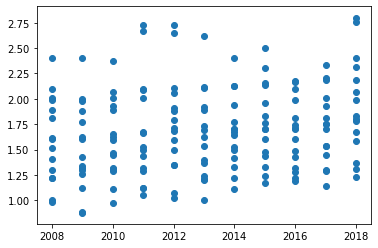

In [36]:
plt.scatter(X1,Y)#year

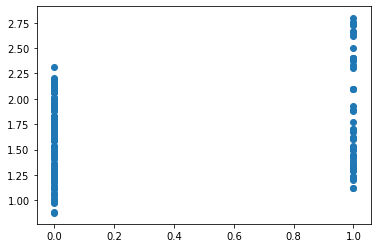

In [37]:
plt.scatter(X2,Y)#state

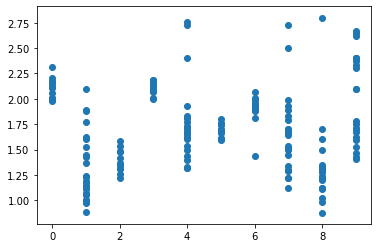

In [35]:
plt.scatter(X3,Y)#Crop

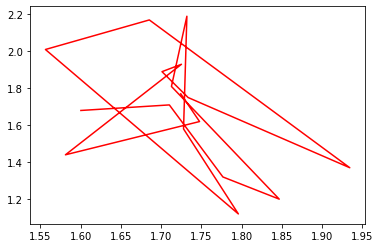

In [41]:
plt.plot(Y_pred,Y_test,color='red')